<h1>Proyecto 1 – Relación Minutos Ingreso</h1>

Presentado por:

**Henry Ragua**

**Gilberto Botia**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (8, 6)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns



In [ ]:
url = ("Credito_dias.csv")
df= pd.read_csv("https://raw.githubusercontent.com/Izainea/seminario-de-programacion/master/Cuadernos/Clase%202/Bases/Credito_dias.csv")
df.head()

,totmou,totrev,creditcd,eqpdays,Customer_ID
0,7269.0,906.58,Y,371,1082423
1,13552.0,1172.25,N,83,1069232
2,4152.0,577.39,Y,675,1031705
3,1863.0,294.26,Y,218,1089806
4,4155.0,433.16,N,222,1076695


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   totmou       10000 non-null  float64
 1   totrev       10000 non-null  float64
 2   creditcd     9848 non-null   object 
 3   eqpdays      10000 non-null  int64  
 4   Customer_ID  10000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


,totmou,totrev,eqpdays,Customer_ID
count,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,7692.804866,1042.133807,386.794500,1.049965e+06
std,8657.917883,857.144895,252.720196,2.879424e+04
min,0.000000,11.100000,-5.000000,1.000014e+06
25%,2576.000000,526.787500,210.000000,1.025053e+06
50%,5262.000000,820.235000,338.000000,1.049652e+06
75%,9823.250000,1272.975000,522.000000,1.074798e+06
max,163264.176700,13426.600000,1823.000000,1.099992e+06


In [ ]:
# se visualizan los primeros registros donde "creditcd" es nulo:
df[df['creditcd'].isnull()].head(20)

,totmou,totrev,creditcd,eqpdays,Customer_ID
44,5684.0,857.65,NaN,244,1072218
47,925.0,373.12,NaN,344,1066597
127,14466.0,2243.76,NaN,387,1023352
253,2504.0,756.79,NaN,495,1045521
427,76260.0,5526.11,NaN,361,1001813
440,14611.0,2191.96,NaN,705,1017656
467,4523.0,304.28,NaN,119,1096542
472,1248.0,344.32,NaN,295,1086331
562,1629.0,319.69,NaN,290,1075263
667,5425.0,744.29,NaN,91,1093201


Al revisar los datos, se puede ver que no son registros anómalos y para este primer ejercicio de comparar los ingresos del cliente con los minutos usados, no es relevante el quitarlos, pero más adelante si se evaluará esta alternativa puesto que se cruzarán estos datos con la variable que me determina si tiene o no crédito

Podemos Visualizar que en las variables a comparar totmou y totrev hay relacion, estan en tipo float64 y no hay valores nulos, podemos pasar a analizar si se correlacionan.

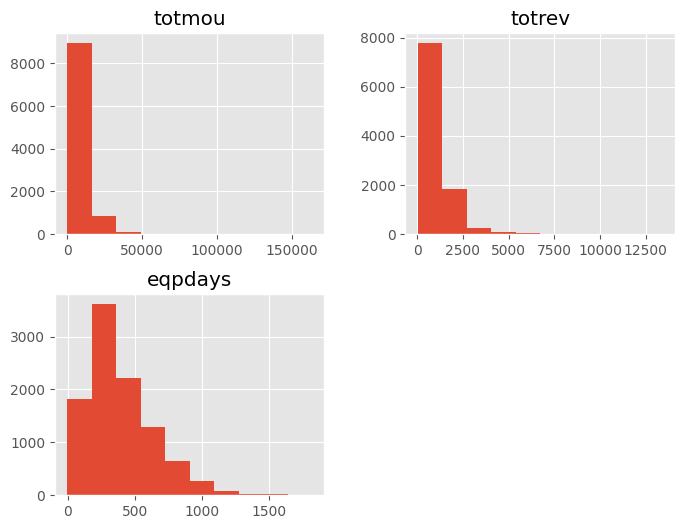

In [ ]:
df.drop(columns=['Customer_ID']).hist()
plt.show()

Se puede concluir que en el histograma de la variable totmou, el mayor porcentaje de los datos están entre cero y 30000.<br>
Se puede concluir que en el histograma de la variable totrev, el mayor porcentaje de los datos están entre cero y 2500.<br>
Se puede concluir que en el histograma de la variable eqpdays, tiene una distribución un poco más normal que las otras.<br>

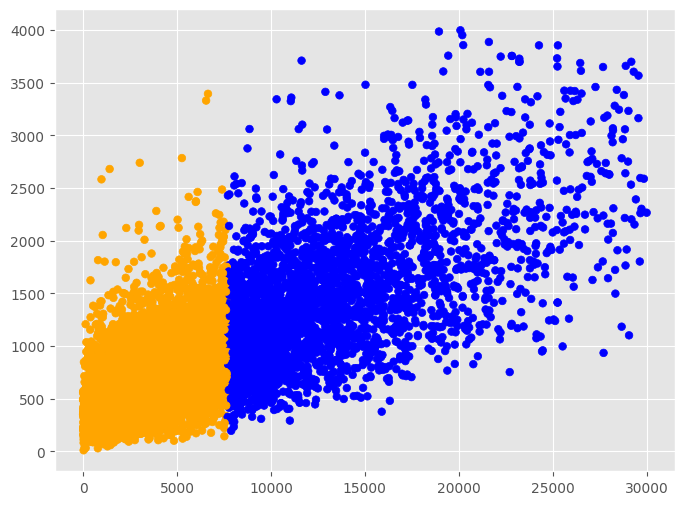

In [ ]:
filtered_data=df[(df['totmou']<=30000)&(df['totrev']<=4000)]
colores=['blue','orange']
tamanios=[30,60]

f1=filtered_data['totmou'].values
f2=filtered_data['totrev'].values

asignar=[]
for index, row in filtered_data.iterrows():
  if(row['totmou']>7692):
    asignar.append(colores[0])
  else:
    asignar.append(colores[1])

plt.scatter(f1,f2,c=asignar,s=tamanios[0])
plt.show()

Gracias a la grafica anterior podemos afirmar que si hay correlacion entre Ingresos del cliente y Total de minutos usados por el cliente.

In [ ]:
#asignamos variable X para entrada de entrenamiento y las etiquetas Y.
dataX=filtered_data[['totmou']]
X_train=np.array(dataX)
y_train=filtered_data['totrev'].values

#creamos el objeto de regresion lineal
regr=linear_model.LinearRegression()

#entrenamos el modelo
regr.fit(X_train, y_train)

#hacemos las predicciones
y_pred=regr.predict(X_train)

#Vemos los coeficientes obtenidos
print('coefficients:\n',regr.coef_)
#valor donde corta el eje y
print('Indepedent term:\n',regr.intercept_)
#error cuadro medio
print("Mean squared error:%.2f"% mean_squared_error(y_train, y_pred))
#puntaje de varianza
print('Variance score:%.2f' % r2_score(y_train, y_pred))



coefficients:
 [0.07976614]
Indepedent term:
 415.65053640527185
Mean squared error:155568.66
Variance score:0.57


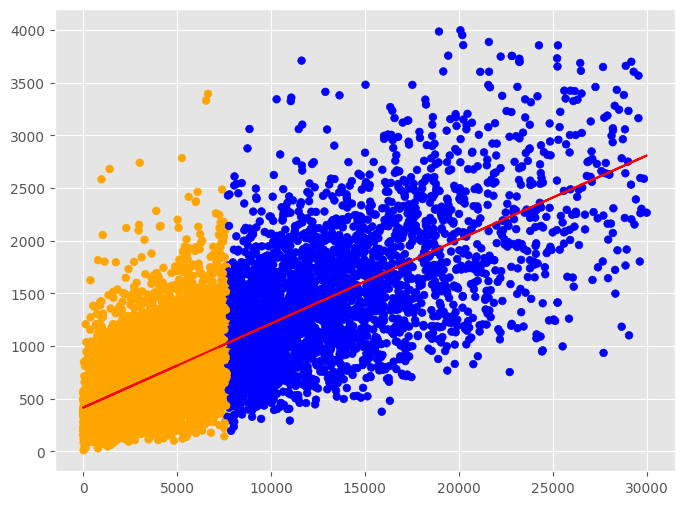

In [ ]:
filtered_data=df[(df['totmou']<=30000)&(df['totrev']<=4000)]
colores=['blue','orange']
tamanios=[30,60]

f1=filtered_data['totmou'].values
f2=filtered_data['totrev'].values

asignar=[]
for index, row in filtered_data.iterrows():
  if(row['totmou']>7692):
    asignar.append(colores[0])
  else:
    asignar.append(colores[1])

plt.scatter(f1,f2,c=asignar,s=tamanios[0])
plt.plot(f1,y_pred,"red")
plt.show()

para correlacionar estos datos con la variable que indica si la persona tiene crédito o no,  se eliminan los nulos del campo creditcd, y luego lo convertimos a número, 1 =Y y 0 = N

In [ ]:
# se eliminan los nulos de la columna creditcd
df_credit = df[df['creditcd'].notnull()]
# se convierte variable 'creditcd' a numero
df_credit['creditcd'] = np.where(df_credit['creditcd'] == 'Y', 1, 0)
# se convierte variable 'creditcd' a tipo entero
df_credit.loc[2] = df_credit.loc[2].astype(int)
# imprimen los primeros registros
df_credit.head()


<ipython-input-134-f00c7277279e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit['creditcd'] = np.where(df_credit['creditcd'] == 'Y', 1, 0)


,totmou,totrev,creditcd,eqpdays,Customer_ID
0,7269.0,906.58,1,371,1082423
1,13552.0,1172.25,0,83,1069232
2,4152.0,577.00,1,675,1031705
3,1863.0,294.26,1,218,1089806
4,4155.0,433.16,0,222,1076695


Comprobamos el tipo de variables

In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9848 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   totmou       9848 non-null   float64
 1   totrev       9848 non-null   float64
 2   creditcd     9848 non-null   int64  
 3   eqpdays      9848 non-null   int64  
 4   Customer_ID  9848 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 719.7 KB


Realizamos los graficos de dispercion y vemos que no hay correlacion alguna.

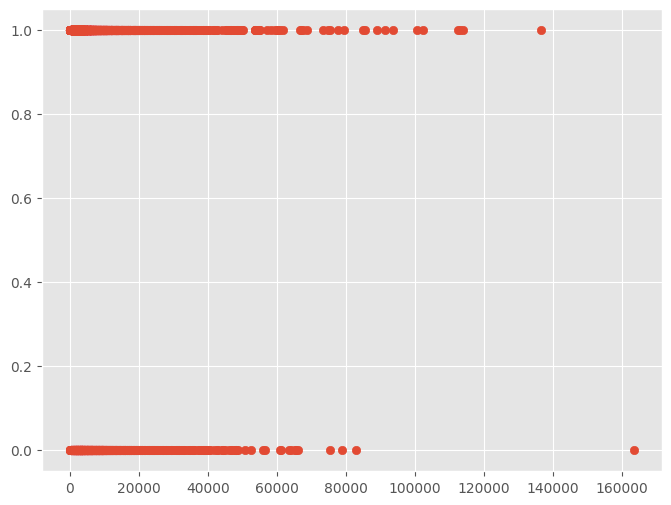

In [ ]:

f3=df_credit['creditcd'].values
f1=df_credit['totmou'].values
f2=df_credit['totrev'].values
plt.scatter(f1,f3)
plt.show()



Vemos que no hay correlacion alguna entre Total de minutos usados por el cliente vs Indicador de tarjeta de crédito

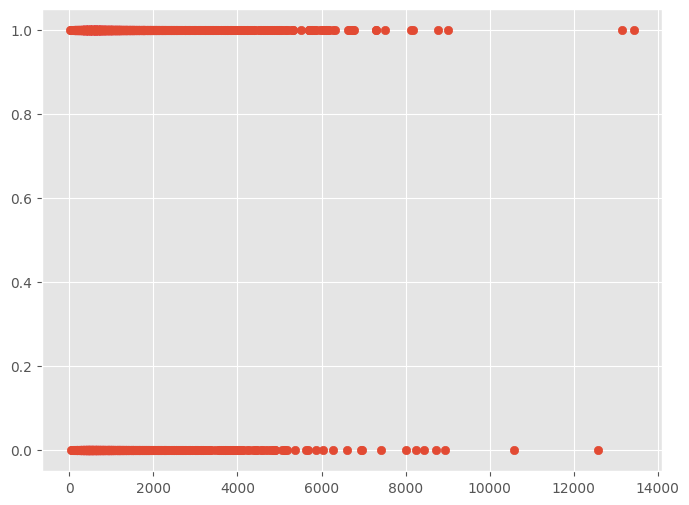

In [ ]:
plt.scatter(f2,f3)
plt.show()

Vemos que no hay correlacion alguna entre Ingresos del cliente vs Indicador de tarjeta de crédito